# HT3 Modelos de regresion lineal

Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869

Del conjunto de archivos proporcionados son: 

- data_description.txt: descripcion de cada columna proporcinado por el conjunto de datos a trabajar

- train.csv: el conjunto de training

- test.csv: el conjunto de test
 
- sample_submission.csv: presentacion de un punto de referencia a partir de una regresion lineal sobre el año y mes de venta.


Pero el único archivo que se usará es: train.csv.

In [1]:
# importacion de librerias 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#cargar los datos
df_train = pd.read_csv("train.csv")

---
# 2. Análisis exploratorio

Obtener una primera impresión del conjunto de datos para identificar posibles áreas que requieran una exploración más profunda. Aquí es donde averiguaremos si es necesario noramlizar los datos.

In [3]:
#exploracion de datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df_train.columns))
print(df_train.shape)
#resumen del set de datos
print("\n--Resumen del set de datos:--")
df_train.describe()



--Columnas:---
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.describe(include="O")  # Estadísticas de las variables categóricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Variables

esta descripcion es tomada de https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

SalePrice: Precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.  
MSSubClass: Clase de edificio.  
MSZoning: Clasificación general de zonificación.  
LotFrontage: Pies lineales de calle conectados a la propiedad.  
LotArea: Tamaño del terreno en pies cuadrados.  
Street: Tipo de acceso vial.  
Alley: Tipo de acceso por callejón.  
LotShape: Forma general de la propiedad.  
LandContour: Planitud del terreno.  
Utilities: Tipo de servicios públicos disponibles.  
LotConfig: Configuración del terreno.  
LandSlope: Inclinación del terreno.  
Neighborhood: Ubicación física dentro de los límites de la ciudad de Ames.  
Condition1: Proximidad a carretera principal o vía de tren.  
Condition2: Proximidad a carretera principal o vía de tren (si hay una segunda).  
BldgType: Tipo de vivienda.  
HouseStyle: Estilo de vivienda.  
OverallQual: Calidad general de materiales y acabados.  
OverallCond: Calificación general del estado de la propiedad.  
YearBuilt: Año de construcción original.  
YearRemodAdd: Año de remodelación.  
RoofStyle: Tipo de techo.  
RoofMatl: Material del techo.  
Exterior1st: Revestimiento exterior principal de la casa.  
Exterior2nd: Revestimiento exterior secundario (si hay más de un material).  
MasVnrType: Tipo de revestimiento de mampostería.  
MasVnrArea: Área de revestimiento de mampostería en pies cuadrados.  
ExterQual: Calidad del material exterior.  
ExterCond: Estado actual del material exterior.  
Foundation: Tipo de cimiento.  
BsmtQual: Altura del sótano.  
BsmtCond: Estado general del sótano.  
BsmtExposure: Nivel del sótano respecto al jardín o salida.  
BsmtFinType1: Calidad del área terminada del sótano.  
BsmtFinSF1: Pies cuadrados terminados tipo 1 del sótano.  
BsmtFinType2: Calidad de una segunda área terminada del sótano (si existe).  
BsmtFinSF2: Pies cuadrados terminados tipo 2 del sótano.  
BsmtUnfSF: Pies cuadrados sin terminar del sótano.  
TotalBsmtSF: Total de pies cuadrados del sótano.  
Heating: Tipo de calefacción.  
HeatingQC: Calidad y estado de la calefacción.  
CentralAir: Aire acondicionado central.  
Electrical: Sistema eléctrico.  
1stFlrSF: Pies cuadrados del primer piso.  
2ndFlrSF: Pies cuadrados del segundo piso.  
LowQualFinSF: Pies cuadrados de acabado de baja calidad (en todos los pisos).  
GrLivArea: Área habitable sobre nivel del suelo en pies cuadrados.  
BsmtFullBath: Baños completos en el sótano.  
BsmtHalfBath: Medios baños en el sótano.  
FullBath: Baños completos sobre nivel del suelo.  
HalfBath: Medios baños sobre nivel del suelo.  
Bedroom: Número de dormitorios sobre el nivel del sótano.  
Kitchen: Número de cocinas.  
KitchenQual: Calidad de la cocina.  
TotRmsAbvGrd: Total de habitaciones sobre nivel del suelo (sin incluir baños).  
Functional: Calificación de funcionalidad de la vivienda.  
Fireplaces: Número de chimeneas.  
FireplaceQu: Calidad de la chimenea.  
GarageType: Ubicación del garaje.  
GarageYrBlt: Año de construcción del garaje.  
GarageFinish: Acabado interior del garaje.  
GarageCars: Capacidad del garaje en cantidad de autos.  
GarageArea: Tamaño del garaje en pies cuadrados.  
GarageQual: Calidad del garaje.  
GarageCond: Estado del garaje.  
PavedDrive: Entrada pavimentada.  
WoodDeckSF: Área de la terraza de madera en pies cuadrados.  
OpenPorchSF: Área del porche abierto en pies cuadrados.  
EnclosedPorch: Área del porche cerrado en pies cuadrados.  
3SsnPorch: Área del porche de tres estaciones en pies cuadrados.  
ScreenPorch: Área del porche con malla en pies cuadrados.  
PoolArea: Área de la piscina en pies cuadrados.  
PoolQC: Calidad de la piscina.  
Fence: Calidad de la cerca.  
MiscFeature: Característica miscelánea no cubierta en otras categorías.  
MiscVal: Valor en dólares de la característica miscelánea.  
MoSold: Mes de venta.  
YrSold: Año de venta.  
SaleType: Tipo de venta.  
SaleCondition: Condición de la venta.  
id: ID de la venta.


Tipo de variables:
Variables cualitativas:

Ordinales:
- OverallQual
- OverallCond
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence


Norminales:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- PavedDrive
- MiscFeature
- SaleType
- SaleCondition

Variables cuantitativas:

Continuas:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- SalePrice

discretras:
- MSSubClass
- YearBuilt
- YearRemodAdd
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageYrBlt
- MoSold
- YrSold

In [6]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
# print(df_train.dtypes)
df_train.info()

tipos_de_datos = df_train.dtypes.value_counts()

print('resumen:')
print(tipos_de_datos)   


----Tipo de datos:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

### Variables que no se tomarán en cuenta por falta de datos
No se tomarán en cuenta las siguiente variables porque tienen demasiados datos faltantes, según las respuestas anteriores, estar variables no nos serán de utilidad.   
Demasiados datos faltantes, irrelevante para el análisis   
- **Alley** 91 non-null / 1460 registros 
- **MasVnrType** 588 non-null / 1460
- **FireplaceQu** 770 non-null / 1460
- **PoolQC** 7 non-null / 1460
- **Fence** 281 non-null / 1460    
- **MiscFeature** 54 non-null / 1460

In [7]:
print(df_train.shape)
# Eliminar las columnas 
columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # Reemplaza con los nombres de las columnas que deseas eliminar
df_train = df_train.drop(columns=columnas_a_eliminar)
print(df_train.shape)
print("Se eliminaron un total de 6 columnas")

(1460, 81)
(1460, 75)
Se eliminaron un total de 6 columnas


## Análisis de la variable que se quiere predecir (SalePrice)

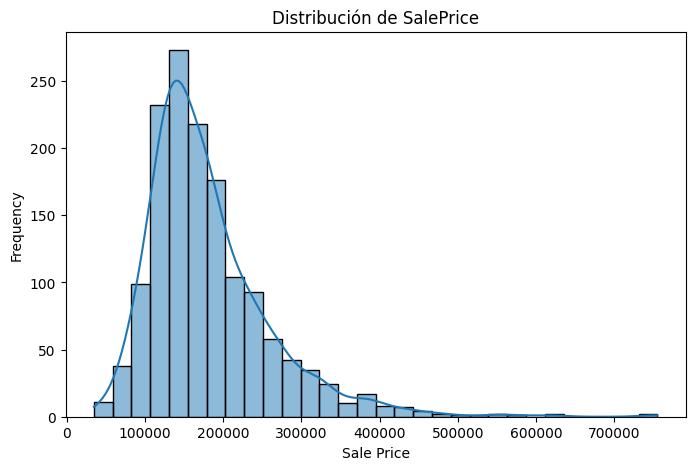

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["SalePrice"], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribución de SalePrice")
plt.show()

#### Interpretación de la gráfica 
Lo que se puede ver en la distribución de SalesPrice es que esta sesgada a la derecha. Esto puede darse debido a datos atípos que la sesgan, que son los precios más altos, ya que al parecer son los menos comunes

## Gráfica de correlación entre variables

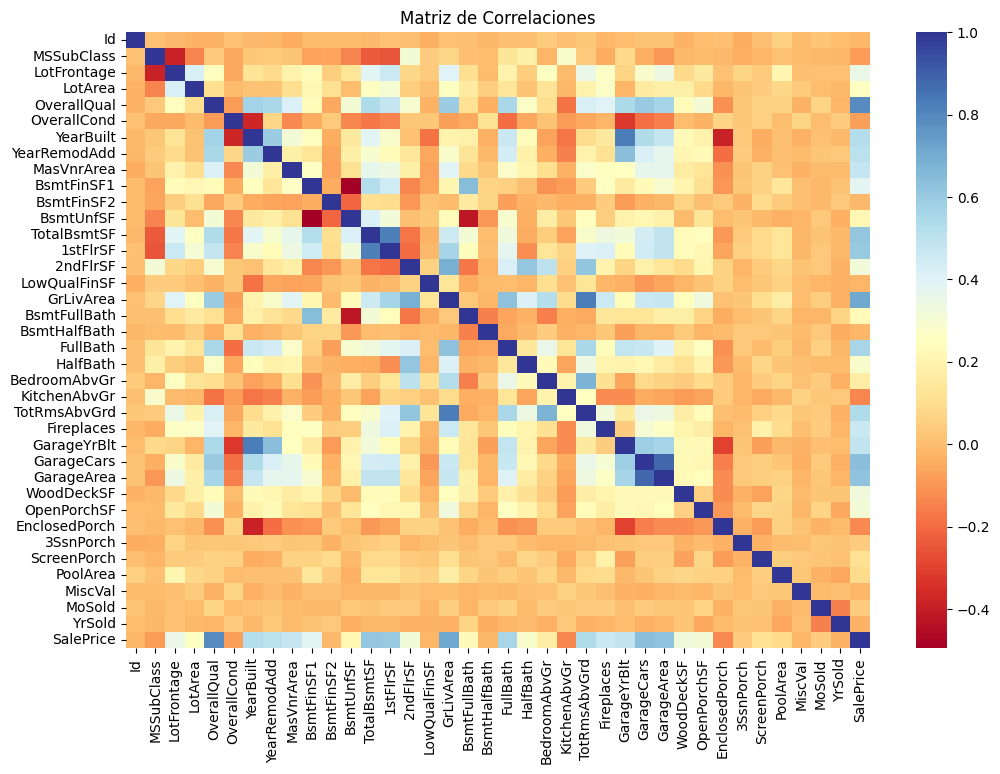

In [9]:
correlation_matrix = df_train.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='RdYlBu', annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

#### Interpretación de la gráfica
Podemos observar una fuerte relación entre SalesPrice y las siguientes variables destacadas en el mapa   
- OverallQUal 
- YearBuilt
- YearRemodAdd
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- GarageYrBlt
- GarageCars
- GarageArea

Analizaremos la variable más fuertemente relacionada a SalesPrice, **OverallQual**, esta variables nos indica la calidad del material.   

#### Visualización del precio de venta promedio por calidad general:

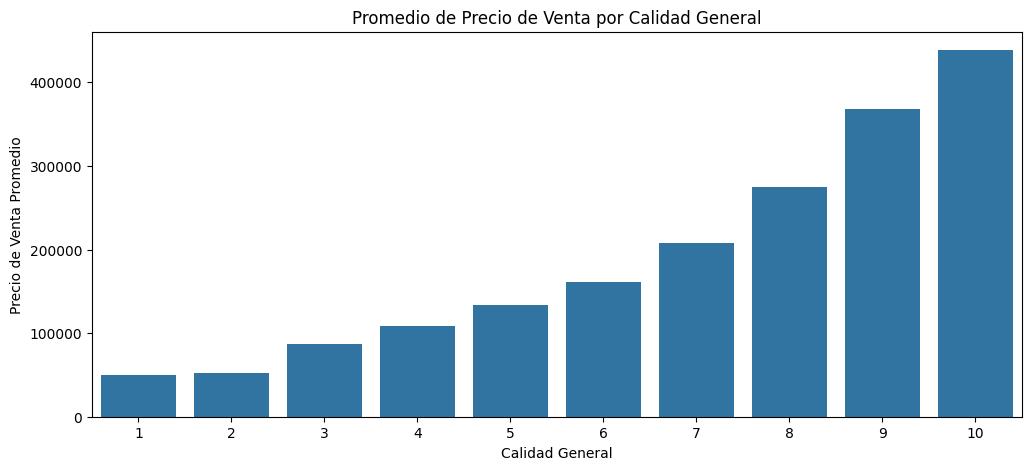

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [10]:
quality_groups = df_train.groupby('OverallQual')['SalePrice'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()


quality_groups

### Análisis de relación entre OverallQual y SalePrice


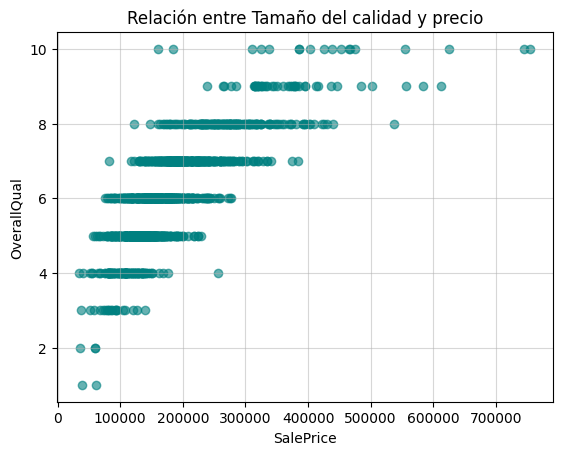

In [11]:
plt.scatter(df_train['SalePrice'], df_train['OverallQual'], color='teal', alpha=0.6)
plt.title('Relación entre Tamaño del calidad y precio')
plt.ylabel('OverallQual')
plt.xlabel('SalePrice')
plt.grid(alpha=0.5)
plt.show()

##### Resultados de la gráfica
Podemos observar que por más que pareciera haber una tendencia de los datos igual hay un rango consideradamente grande entre los precios, especialmente mientras mayor sea la calidad general del material 

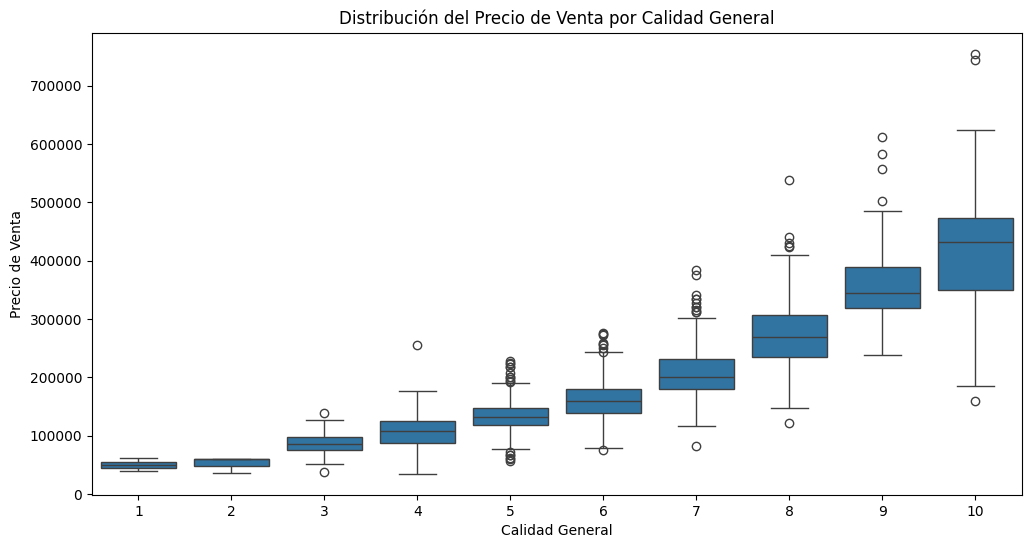

In [12]:

# Crear la gráfica de caja y bigotes para 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.title("Distribución del Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta")
plt.show()

Se pueden observar muchos datos atípicos para cada uno de las ventas segun la cualidad que se usó. 

### Hallazgos generales de los conjuntos de datos

La variable objetico que es la de SalesPrice, esta sesgada a la derecha, por lo cual es recomendable normalizar los datos para evitar sesgos en el modelo. Ya que, las variables tienen diferentes escalas y unidades.

---
# 3. Incluya un análisis de grupos en el análisis exploratorio. Explique las características de cada uno.

### Variables con las que se calcularan los grupos para proyectar el precio de las viviendas de manera precisa. 

Se han considerado las siguientes variables: 
- OverallQual: Calidad general de la vivienda.
- GrLivArea: area habitable por encima del nivel del suelo en pies cuadrados
- Neighborhood: Ubicación física dentro de los límites de la ciudad
- TotalBsmtSF: area total del sotano en pies cuadrados
- 1stFlrSF: area del primer piso
- GarageCars: capacidad del garage en numero de carros
- GarageArea: area del garage en pies cuadrados
- YearBuilt: año en que se construyó la vivienda
- YearRemod: año en que se remodeló la vivienda
- FullBath: numero de baños completos
- LotFrontage: longitud de la propiedad en pies
- LotArea: area de la propiedad en pies cuadrados
- SalePrice: valor de la propiedad (esta es la que se trata de predecir)


In [13]:
#nuevo data frame con solo la informacion que se va a utilizar
df = df_train[['SalePrice','OverallQual', 'GrLivArea', 'Neighborhood', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']].copy()

### Tendencia de agrupamiento

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
numeric_columns = ['SalePrice','OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
categorical_columns = ['Neighborhood']

numeric_df = df[numeric_columns]
categoric_df = df[categorical_columns]
combined_df = pd.concat([numeric_df, categoric_df], axis=1)

print(combined_df.shape)
print(combined_df.isnull().sum())

clean_df = combined_df.dropna()
print(clean_df.shape)

num_df = clean_df[numeric_columns]
cat_df = clean_df[categorical_columns]

#variables predictoras
X_values = ['OverallQual', 'GrLivArea',  'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotFrontage', 'LotArea']
X = num_df[X_values]

#variable objetivo
y= num_df['SalePrice']

assert not np.any(np.isnan(X)), "X contiene NaN"
assert not np.any(np.isnan(y)), "y contiene NaN"


(1460, 13)
SalePrice         0
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
1stFlrSF          0
GarageCars        0
GarageArea        0
YearBuilt         0
YearRemodAdd      0
FullBath          0
LotFrontage     259
LotArea           0
Neighborhood      0
dtype: int64
(1201, 13)


In [15]:
import random
import sklearn.preprocessing
import pyclustertend

# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(X)
X_df =pd.DataFrame(X_scale)


# Crear muestras, esto se hace para tener una visualizacion mas clara y entender mejor la tendencia de agrupamiento
X_scale_sample = X_df.sample(100, random_state=123)
X_sample = X.sample(100, random_state=123)

# Convertir las muestras a arrays de numpy
X_scale_sample = X_scale_sample.to_numpy()
X_sample = X_sample.to_numpy()

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat}')

Estadística de Hopkins: 0.08465925708950299


En la estadística de Hopkins los valores que se encuentran cercanos a 0, indican que los datos estan muy agrupados, lo que sugiere que hay una estructura clara y que el clustering puede ser bastante efectivo. 

Aqui los resultados estan cercanos a 0, indican que los datos estan muy agrupados.

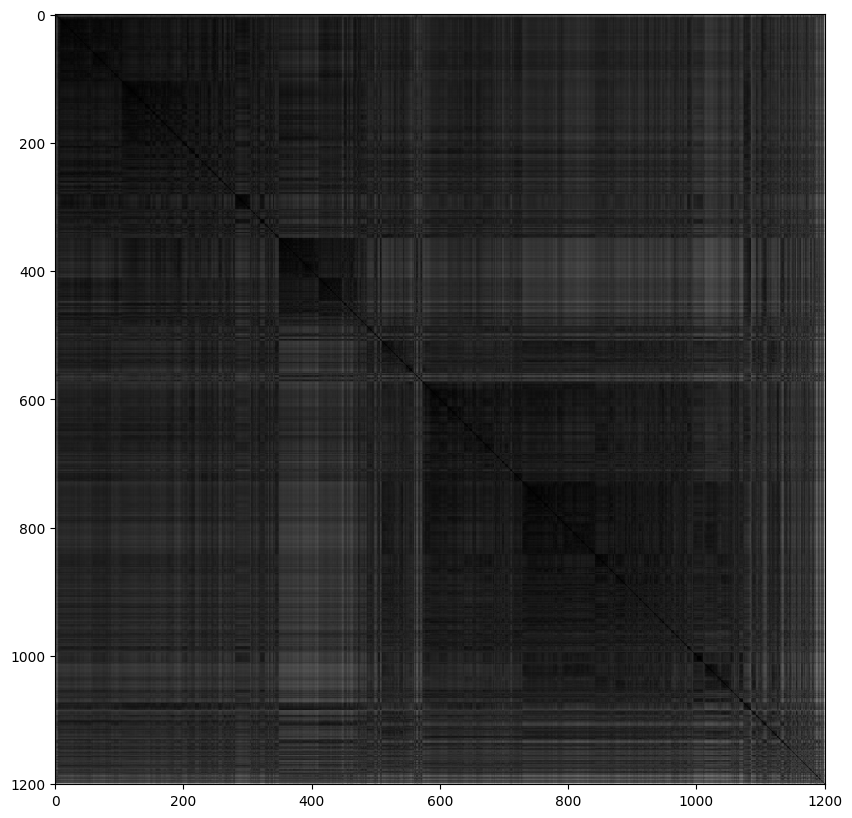

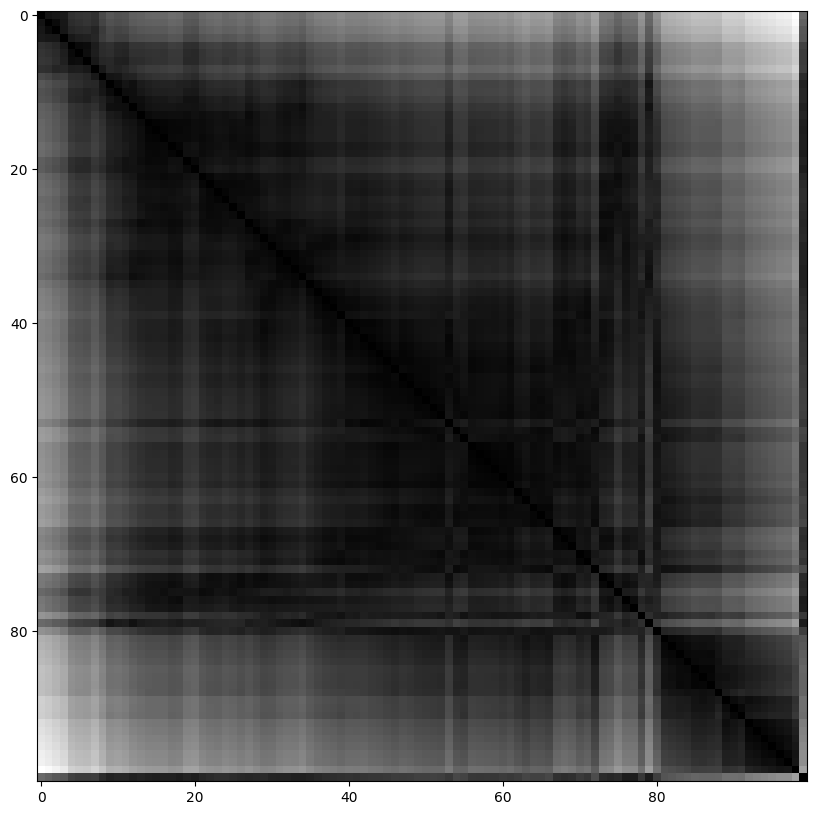

In [16]:
pyclustertend.vat(X_scale)

pyclustertend.vat(X_sample)

La gráfica VAT muestra una matriz de distancia, en donde los puntos representan la distancia entre los datos. La transición de negro a gris claro lo que nos indica es la intensidad de distancias. Siendo el negro distancias cortas y el gris claro distancias largas. Cuando hay áreas grandes de negro, lo que nos indica es que hay clusters muy cerca entre sí. Y se trabajó con una muestra de datos, ya que al usar todos los datos la visualización es bastante densa, por lo cual se decidió trabajar con una muestra de datos para poder visualizar mejor la gráfica.

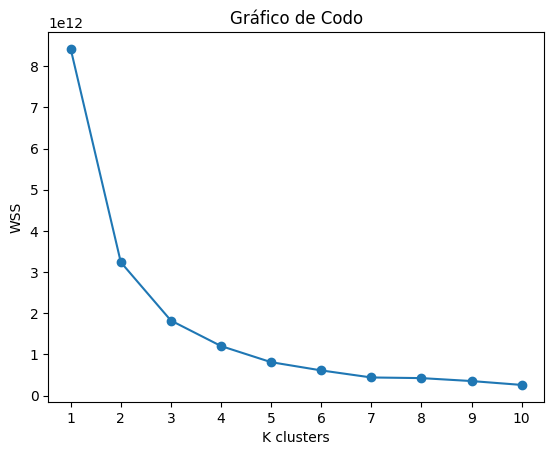

In [17]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#saber el numero de K clusters
numeroClusters = range(1,11)
wcss = []

for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(num_df)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("K clusters")
plt.ylabel("WSS")
plt.title("Gráfico de Codo")
plt.show()

Al analizar el grafico de codo, K=2 es un buen numero para los datos, ya que en la suma de wss disminuye rapidamente hasta 2 clusters y luego ya se vuelve mas gradual.

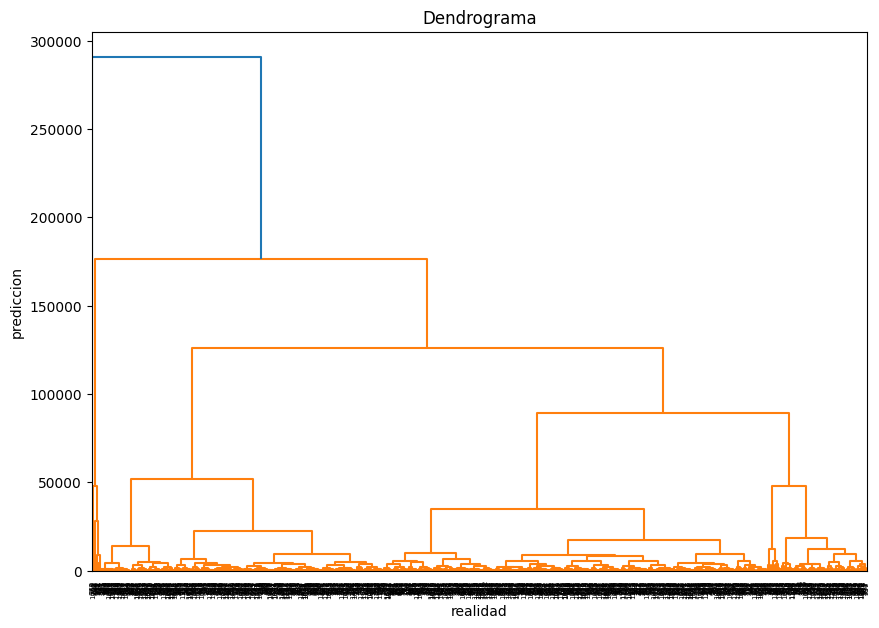

In [18]:
#clustering jerargico
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

# #calcular la matriz de distancias
dist = pdist(X, metric = 'euclidean')
#dendograma
plt.figure(figsize=(10, 7))
linkage = shc.linkage(X, method='ward')
dendro = shc.dendrogram(linkage)
plt.title("Dendrograma")
plt.xlabel("realidad")
plt.ylabel("prediccion")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.9753672650140027
For n_clusters = 3 The average silhouette_score is : 0.8723447671588405
For n_clusters = 4 The average silhouette_score is : 0.4533545679599374
For n_clusters = 5 The average silhouette_score is : 0.48333710352232157
For n_clusters = 6 The average silhouette_score is : 0.4828219940203071


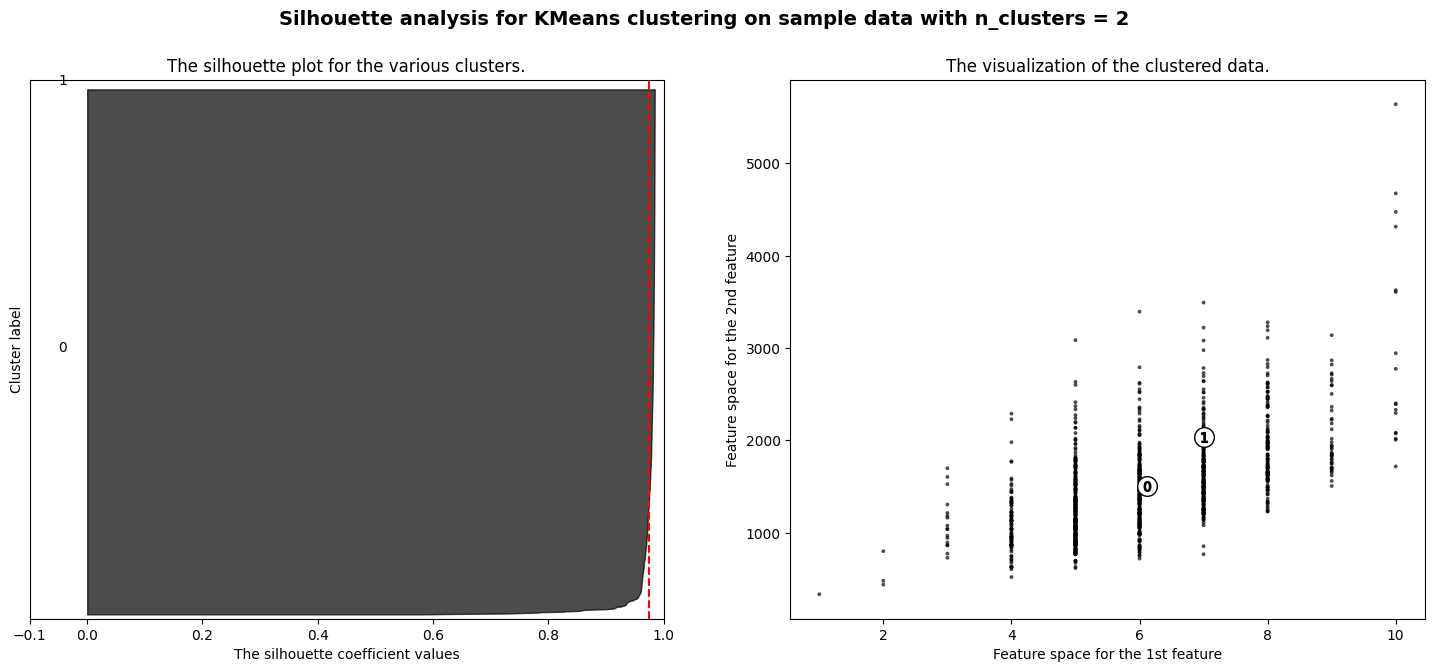

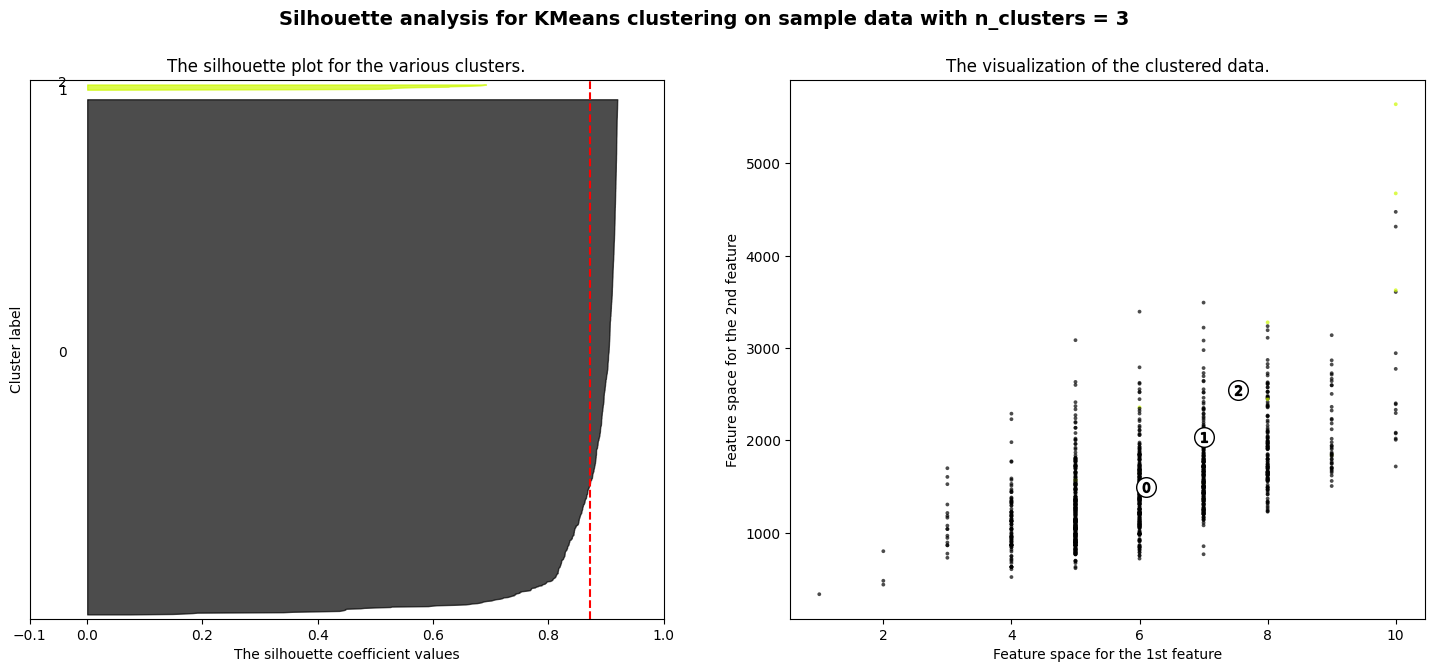

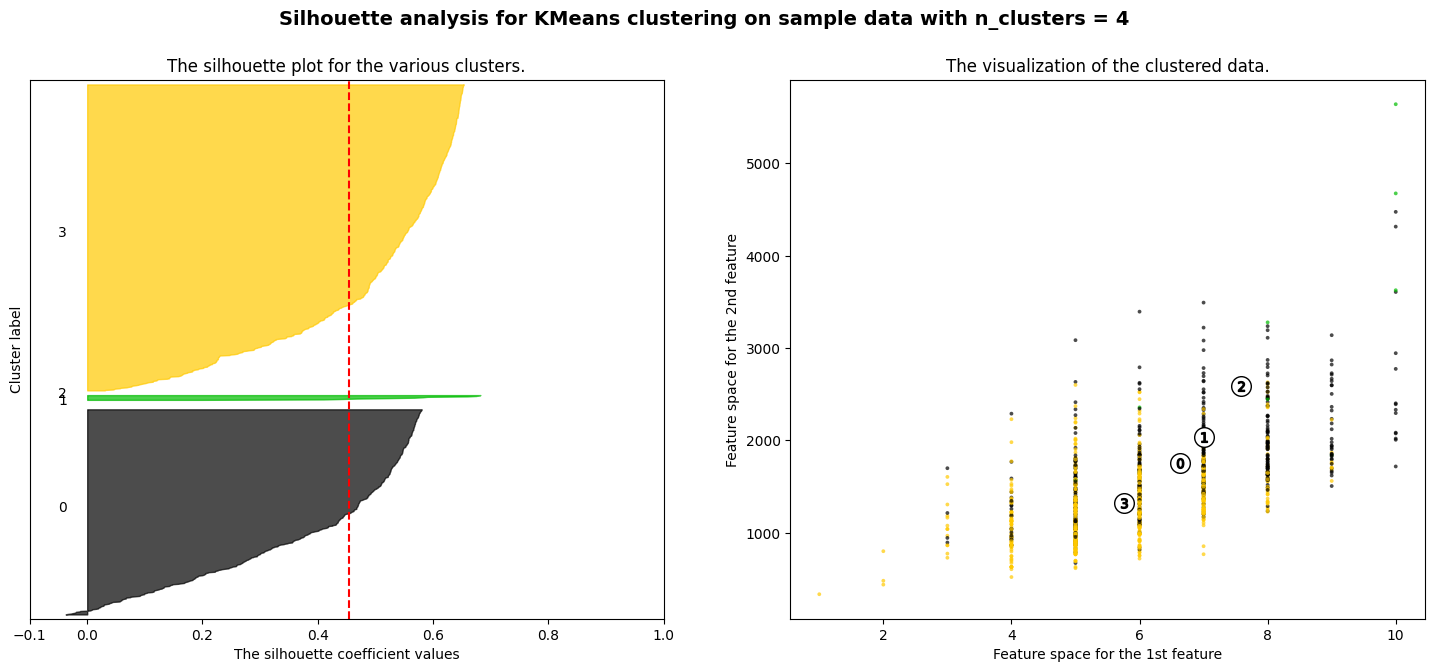

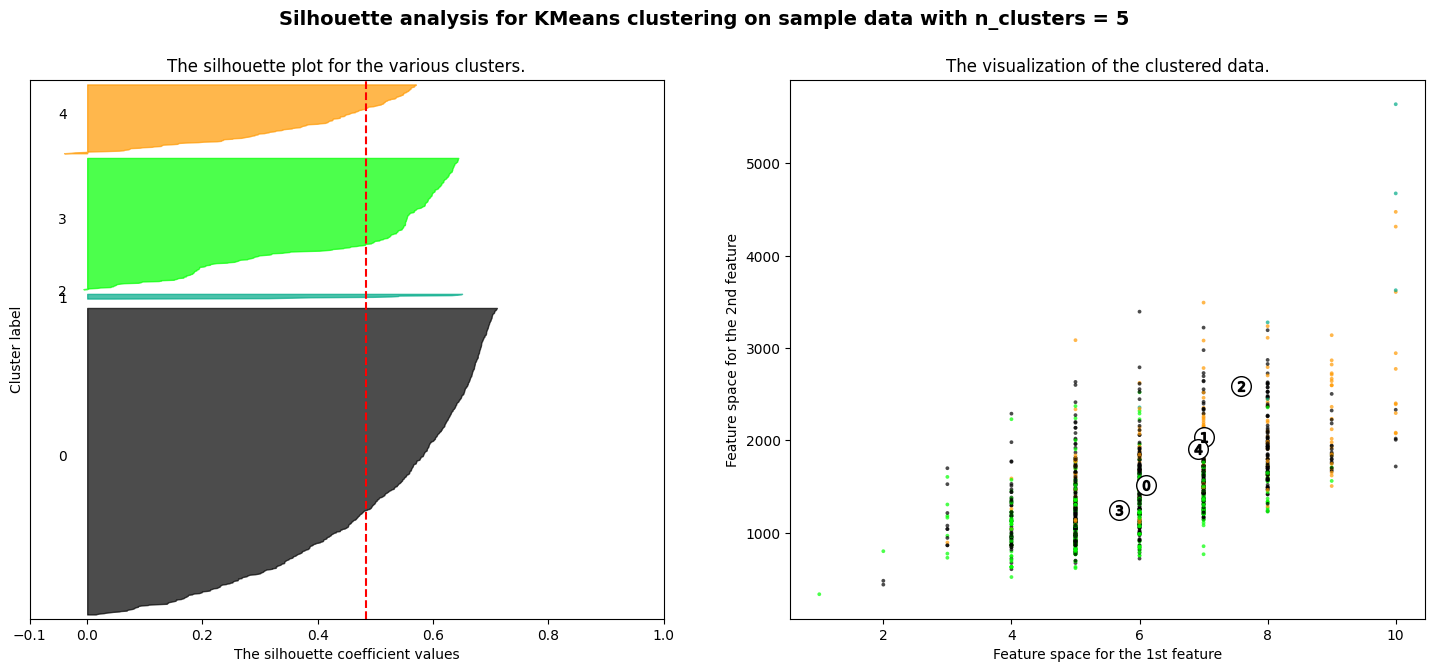

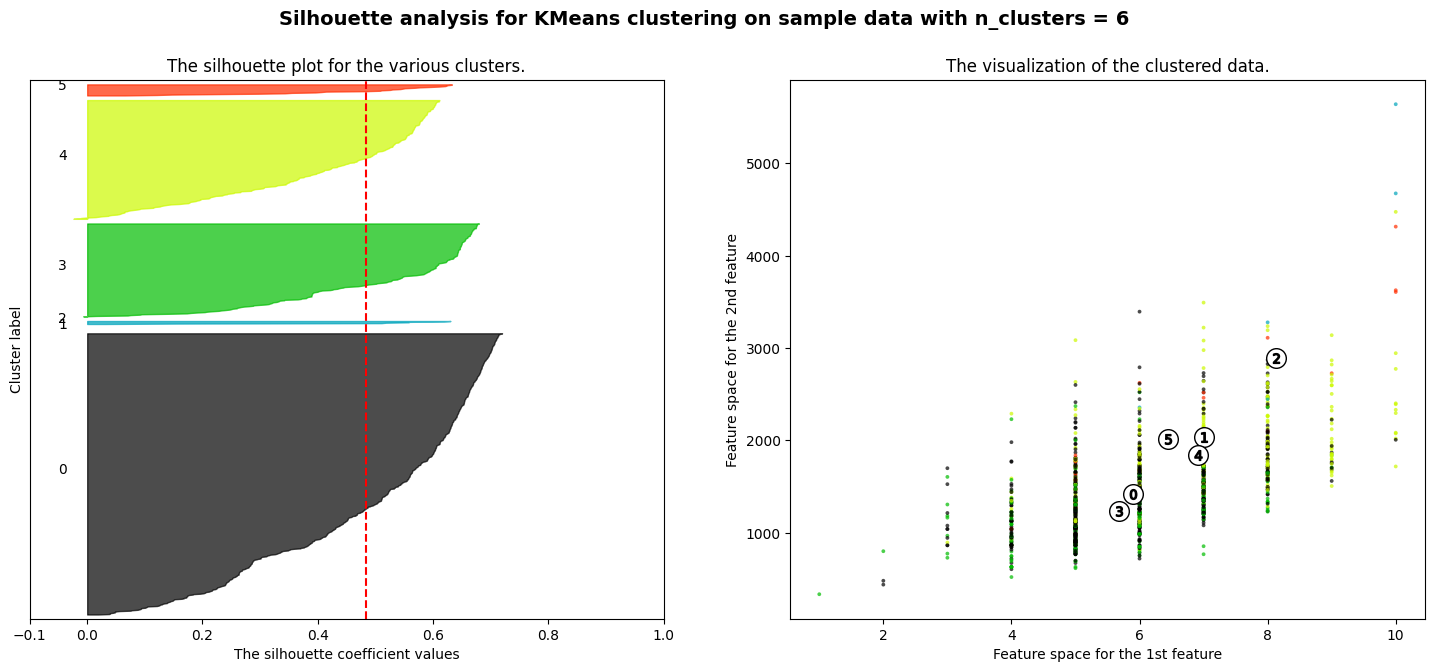

In [19]:
'''
este algoritmo fue tomado del archivo que dice Clustering.ipynb de la carpeta de ejemplos en modulos de la clase
'''


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# convertir x en un np.array
X_array = X.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_array[:, 0], X_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

El grafico de la silueta, lo que mide es que tan similar un punto a otros dentro del mismo cluster. Y este puede variar entre -1 a 1. Siendo un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus propios clusters y lejos de otros clusters.

Para este caso, en el gráfico, se ve que el número 2 de clusters es el que produce un resultado más equilibrado y el que tiene un valor de silueta más alto promedio. Por lo cual, concuerda con los resultados del dendograma.


----------
### Division de datos entrenamiento y prueba
Se utiliza el set de datos test que ya esta seleccionado 

### Uso de f_regression
Este es para el ver la importancia de las caracteristicas con el uso de regresion lineal, ya que este evalua la relacion entre cada caracteristica independiente y la variable objetivo usando pruebas de regresion lineal univariable.


las catacteristicas seleccionadas son:  Index(['OverallQual', 'GrLivArea'], dtype='object')


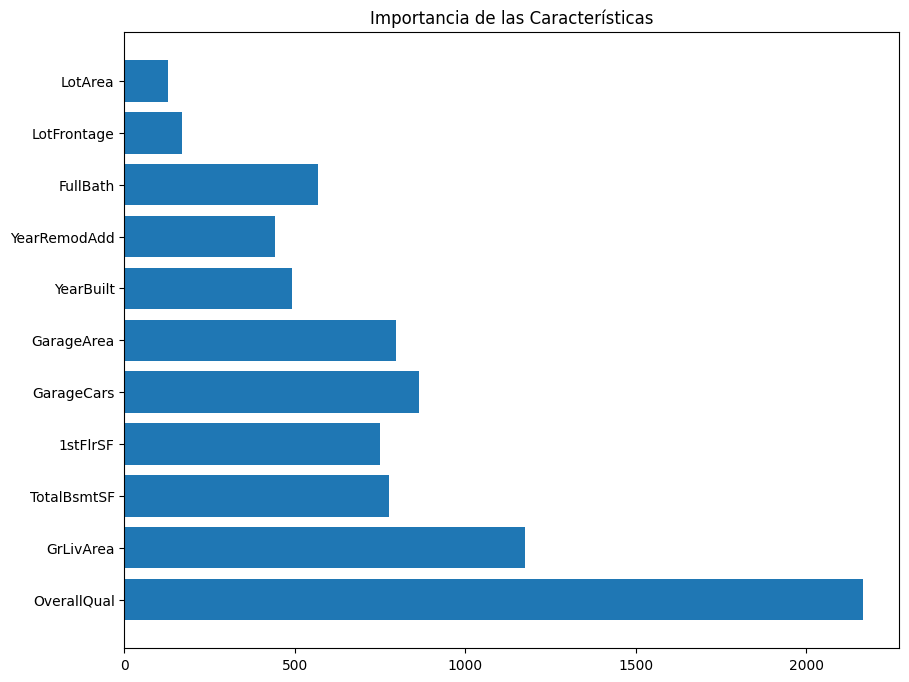

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, f_regression

selector= SelectKBest(f_regression, k=2) #seleccionar las mejores caracteristicas
selector.fit(X, y) #ajustar el selector de datos

features_Selected = selector.get_support(indices=True)
features_Selected_names = X.columns[features_Selected]
print("las catacteristicas seleccionadas son: ", features_Selected_names)

#grafico de la importancia de la categoria
plt.figure(figsize=(10, 8))
plt.barh(X.columns, selector.scores_)
plt.title("Importancia de las Características")
plt.show()

La variable que es un mejor predictor para SalePrice es OverQual segun los resultados obtenidos. Luego, estan las variables de GrLiveArea, GarageCars y GarageArea.

---
# 7. La caracteristica seleccionada: OverallQual
### Análisis univariable

Coeficiente: [44379.87767098]
Intercepto: -90233.22290028064
Error cuadrático medio (MSE) en entrenamiento: 2283848608.7597637
Error cuadrático medio (MSE) en prueba: 2681026163.5090904
R^2 en entrenamiento: 0.6170962665508342
R^2 en prueba: 0.6504677778896863
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          2.60e-245
Time:                        23:18:06   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            

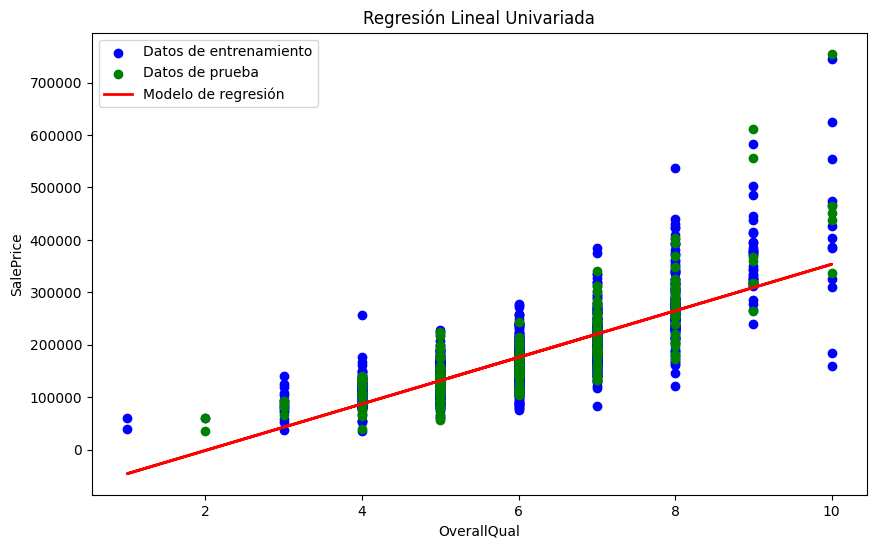

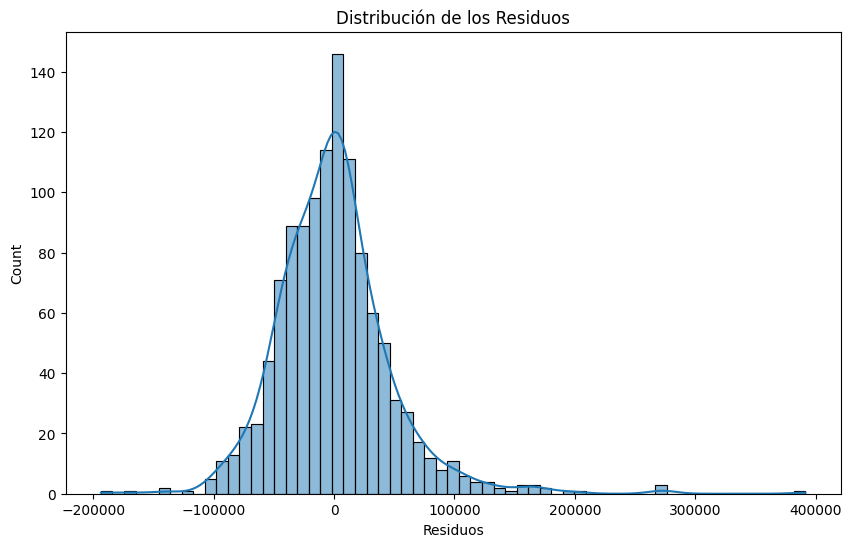

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = df_train[['OverallQual']]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Coeficiente:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))

# Resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Añadir constante para el intercepto
modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Modelo de regresión')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Regresión Lineal Univariada')
plt.legend()
plt.show()

# Visualizar los residuos
residuos = y_train - y_pred_train
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()

## Hallazgos
El modelo muestra buena relación entre lo predicho y lo que debería de ser. El modelo de regresión lineal univariado utilizando OverallQual como predictor tiene un R² de aproximadamente 0.617 en el conjunto de entrenamiento y 0.650 en el conjunto de prueba, lo que indica que OverallQual es un predictor significativo del precio de venta (SalePrice).   
Los residuos estan normalmente distribuidos

---
# 8. Haga un modelo de regresión lineal con todas las variables numéricas

Se seleccionan los datos numéricos y se limpian los datos que tienen vacios

In [ ]:
print(df_train.shape)
df_numerico = df.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)
print(df_numerico.info())


(1460, 75)
<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1201 non-null   int64  
 1   OverallQual   1201 non-null   int64  
 2   GrLivArea     1201 non-null   int64  
 3   TotalBsmtSF   1201 non-null   int64  
 4   1stFlrSF      1201 non-null   int64  
 5   GarageCars    1201 non-null   int64  
 6   GarageArea    1201 non-null   int64  
 7   YearBuilt     1201 non-null   int64  
 8   YearRemodAdd  1201 non-null   int64  
 9   FullBath      1201 non-null   int64  
 10  LotFrontage   1201 non-null   float64
 11  LotArea       1201 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 122.0 KB
None


Coeficientes: [ 2.04306057e+04  4.10544732e+01  1.21062220e+01  1.17596049e+01
  9.73410321e+03  2.31359794e+01  2.75936963e+02  3.31729010e+02
 -4.14533710e+03 -2.30692108e+01  8.91314081e-01]
Intercepto: -1264655.4910840802
Error cuadrático medio (MSE) en entrenamiento: 1577358068.0273423
Error cuadrático medio (MSE) en prueba: 1539131058.7860858
R^2 en entrenamiento: 0.7537546564722775
R^2 en prueba: 0.8282800313501347
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          1.95e-279
Time:                        23:46:47   Log-Likelihood:                -11528.
No. Observations:                 960   AIC:                         2.308e+04
Df Residuals:        

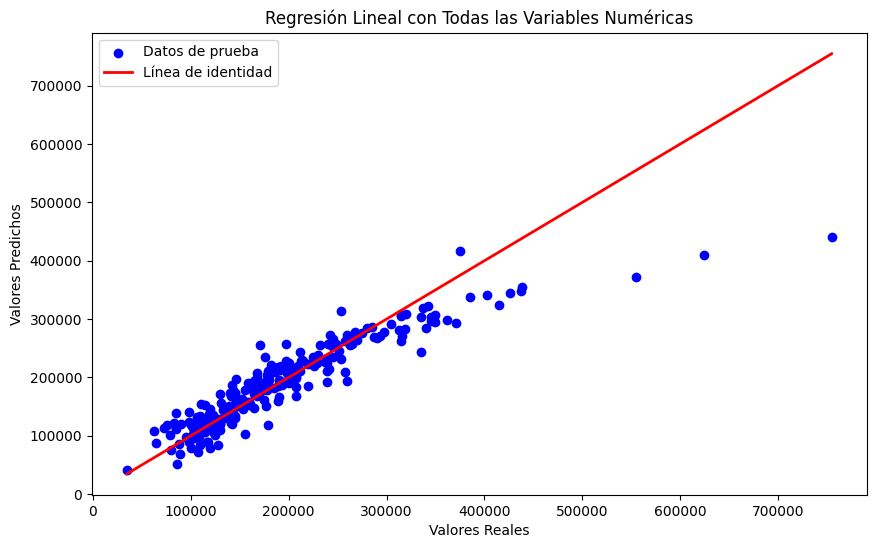

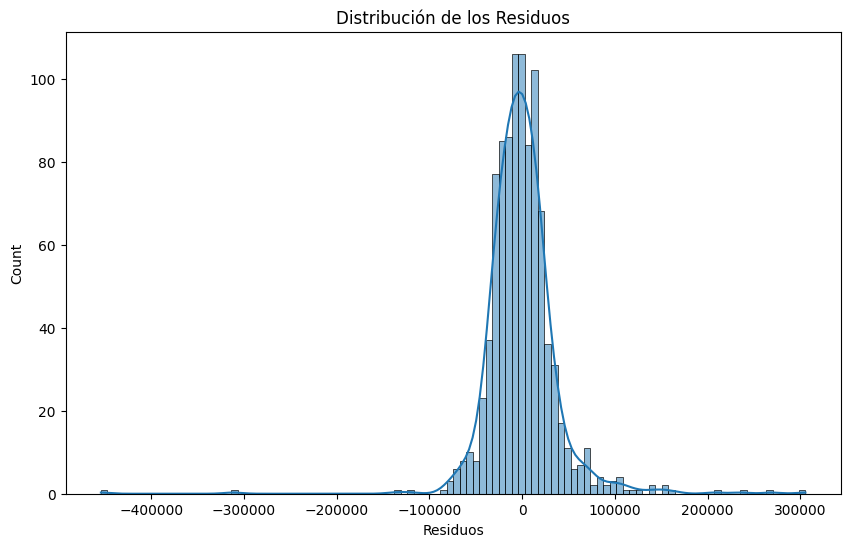

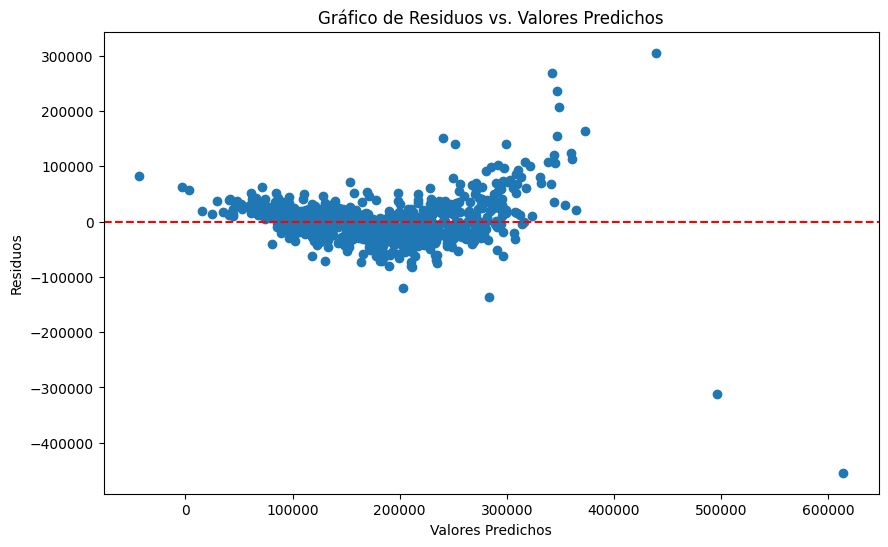

Estadístico de Shapiro-Wilk: 0.7792683675732192
p-valor: 4.60135090448839e-34


In [ ]:

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))

# Resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Añadir constante para el intercepto
modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Datos de prueba')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal con Todas las Variables Numéricas')
plt.legend()
plt.show()

# Visualizar los residuos
residuos = y_train - y_pred_train
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

# Prueba de normalidad de los residuos
from scipy.stats import shapiro

stat, p_value = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-valor:', p_value)

---
# 9. Haga un análisis de correlación de las características del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular VIF para cada variable en X_train
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Mostrar variables con VIF alto (usualmente > 5 indica alta multicolinealidad)
print(vif_data[vif_data["VIF"] > 5])

        Variable          VIF
0    OverallQual    48.693142
1      GrLivArea    25.123000
2    TotalBsmtSF    23.886268
3       1stFlrSF    38.127447
4     GarageCars    31.545779
5     GarageArea    28.482036
6      YearBuilt  7615.754243
7   YearRemodAdd  7414.595391
8       FullBath    18.367234
9    LotFrontage    14.198947
10       LotArea     7.050663


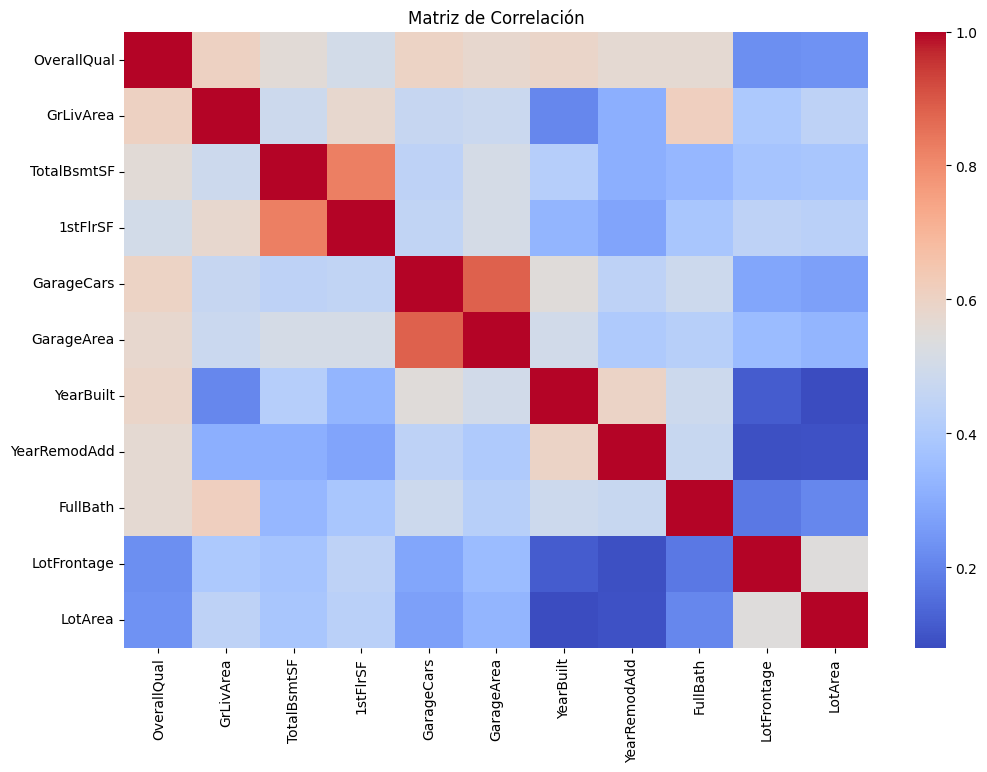

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()
corr_matrix = df_train.select_dtypes(include=["number"]).corr()
mejores_variables = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10)
print(mejores_variables)

In [74]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear el modelo de regresión lineal
modelo_mejorado = LinearRegression()

# Realizar la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = cross_val_score(modelo_mejorado, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir a valores positivos
cv_mse_scores = -cv_mse_scores
mean_cv_mse = np.mean(cv_mse_scores)
std_cv_mse = np.std(cv_mse_scores)

print(f"Mean CV MSE: {mean_cv_mse:.2f} ± {std_cv_mse:.2f}")

# Calcular el MSE en el conjunto de entrenamiento
modelo_mejorado.fit(X_train, y_train)
y_pred_train_mejorado = modelo_mejorado.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train_mejorado)

print(f"Train MSE: {train_mse:.2f}")

if train_mse < mean_cv_mse * 0.7:
    print("Posible overfitting")
elif mean_cv_mse > train_mse * 1.5:
    print("Alta probabilidad de overfitting.")
else:
    print("No overfitting detectado")

Mean CV MSE: 1845518107.69 ± 845781344.23
Train MSE: 1267134578.65
Posible overfitting


#### Interpretacion de resultados
Podemos observar que resultado del croos validation nos muestra un posible overfitting. El R2 de los datos de entrenamiento está por debajo del R2 del de prueba, pero está dentro del rango aceptable. A pesar de esto, en general el modelo parece adaptarse bien a los datos. A continuación se probarán otros modelos que ayuden a predecir mejor el modelo 

**Ajustar el modelo con Ridge para evitar el sobreajuste**

Ridge Regression:
Error cuadrático medio (MSE) en entrenamiento: 1267164224.6518028
Error cuadrático medio (MSE) en prueba: 1591085141.5172
R^2 en entrenamiento: 0.808210432988234
R^2 en prueba: 0.7982730579447055
Raíz del error cuadrático medio (RMSE) en prueba: 39888.40861098873


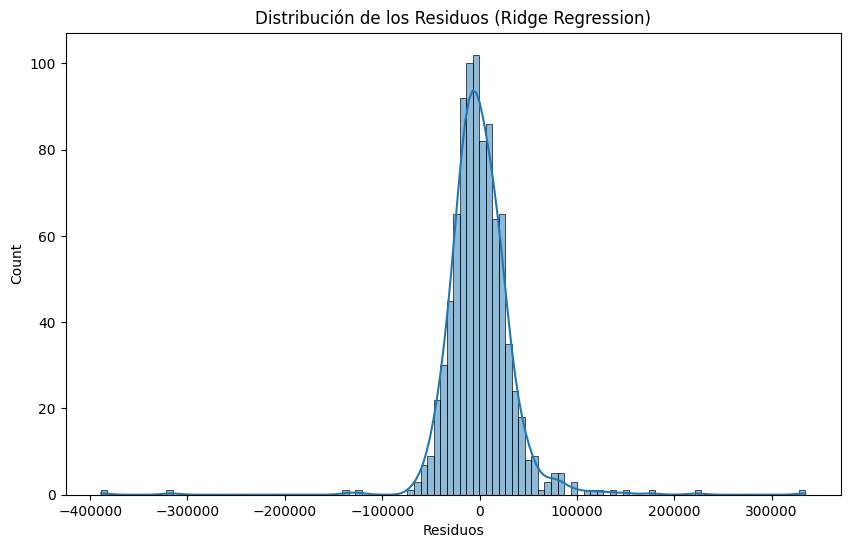

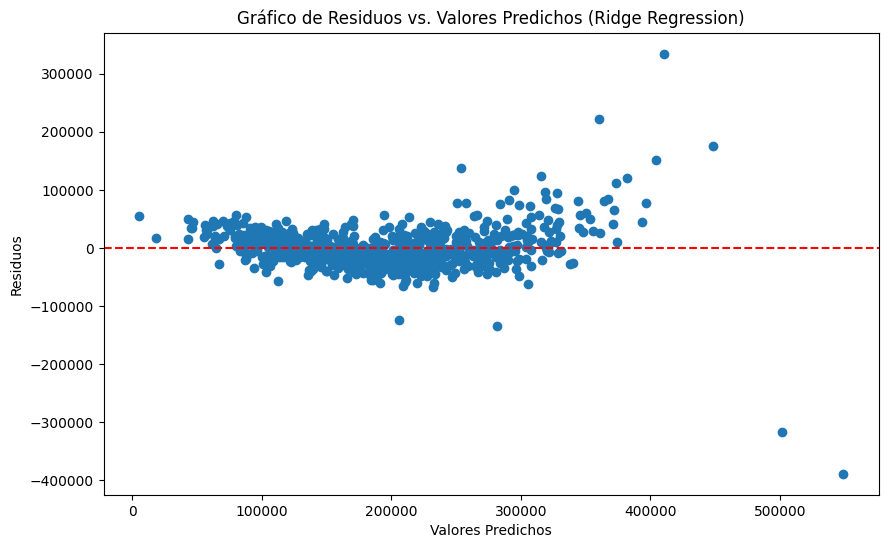

Estadístico de Shapiro-Wilk (Ridge Regression): 0.7717527586820583
p-valor (Ridge Regression): 1.6808256279005262e-33
Cross-validation MSE scores (Ridge Regression): [-1.18132079e+09 -1.35021522e+09 -6.19071049e+08 -1.15903823e+09
 -9.52179976e+08]
Mean CV MSE (Ridge Regression): -1052365052.36 ± 250800404.69
No overfitting detectado


In [110]:
from sklearn.linear_model import Ridge

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

X = df_numerico.drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de Ridge Regression
modelo_ridge = Ridge(alpha=1.0)  
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones con Ridge Regression
y_pred_train_ridge = modelo_ridge.predict(X_train)
y_pred_test_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de rendimiento para Ridge Regression
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print("Ridge Regression:")
print("Error cuadrático medio (MSE) en entrenamiento:", mse_train_ridge)
print("Error cuadrático medio (MSE) en prueba:", mse_test_ridge)
print("R^2 en entrenamiento:", r2_train_ridge)
print("R^2 en prueba:", r2_test_ridge)
print("Raíz del error cuadrático medio (RMSE) en prueba:", rmse_test_ridge)

# Calcular los residuos
residuos_ridge = y_train - y_pred_train_ridge

plt.figure(figsize=(10, 6))
sns.histplot(residuos_ridge, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos (Ridge Regression)')
plt.show()

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_ridge, residuos_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos (Ridge Regression)')
plt.show()

# Prueba de normalidad de los residuos
stat_ridge, p_value_ridge = shapiro(residuos_ridge)
print('Estadístico de Shapiro-Wilk (Ridge Regression):', stat_ridge)
print('p-valor (Ridge Regression):', p_value_ridge)

# Realizar la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores_ridge = cross_val_score(modelo_ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir a valores positivos
cv_mse_scores_ridge = -cv_mse_scores
mean_cv_mse_ridge = np.mean(cv_mse_scores_ridge)
std_cv_mse_ridge = np.std(cv_mse_scores_ridge)

print("Cross-validation MSE scores (Ridge Regression):", cv_mse_scores_ridge)
print(f"Mean CV MSE (Ridge Regression): {mean_cv_mse_ridge:.2f} ± {std_cv_mse_ridge:.2f}")

if train_mse < mean_cv_mse * 0.7:
    print("Posible overfitting")
elif mean_cv_mse > train_mse * 1.5:
    print("Alta probabilidad de overfitting.")
else:
    print("No overfitting detectado")

# 10. Si tiene multicolinealidad o sobreajuste, haga un modelo con las variables que sean mejores predictoras del precio de las casas. Determine la calidad del modelo realizando un análisis de los residuos. Muéstrelo gráficamente

In [86]:
from sklearn.linear_model import Ridge

# Variables con menor colinealidad y mayor correlación
variables_relacionadas = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]

X_train_selected = X_train[variables_relacionadas]
X_test_selected = X_test[variables_relacionadas]

# Aplicar modelo Ridge para reducir multicolinealidad
ridge = Ridge(alpha=10)
ridge.fit(X_train_selected, y_train)

# Validación cruzada
cv_scores = cross_val_score(ridge, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation MSE: {cv_mse:.2f} ± {cv_std:.2f}")

Cross-Validation MSE: 1790219368.56 ± 589515191.20


### Modelo random forest
Probando otro modelo para resolver el overfitting

Error cuadrático medio (MSE) en entrenamiento (Random Forest): 154711303.3954993
Error cuadrático medio (MSE) en prueba (Random Forest): 998378467.5390733
R^2 en entrenamiento (Random Forest): 0.9765839239201989
R^2 en prueba (Random Forest): 0.873419825240489


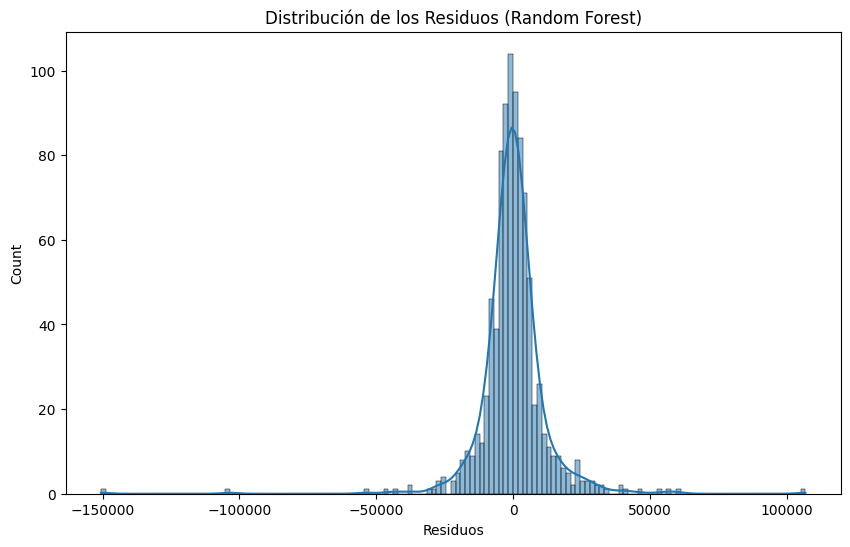

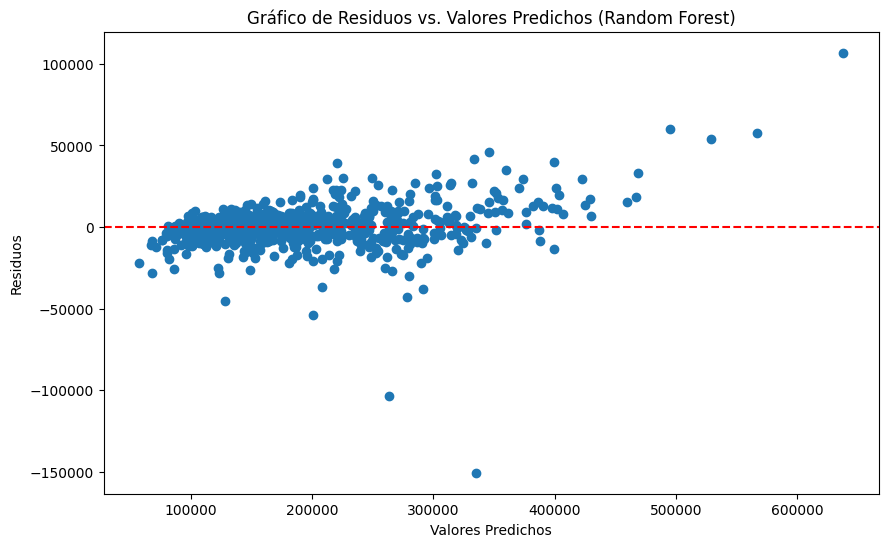

p-valor (Random Forest): 1.5928651291032562e-34
Train MSE: 1267134578.65
No overfitting detectado


In [108]:


# Supongamos que 'df_train' es tu DataFrame
from sklearn.ensemble import RandomForestRegressor

# Seleccionar todas las variables numéricas
df_numerico = df_train.select_dtypes(include=['number'])

# Eliminar filas con valores faltantes
df_numerico.dropna(inplace=True)

X = df_numerico.drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_train_rf = modelo_rf.predict(X_train)
y_pred_test_rf = modelo_rf.predict(X_test)

# Calcular métricas de rendimiento
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("Error cuadrático medio (MSE) en entrenamiento (Random Forest):", mse_train_rf)
print("Error cuadrático medio (MSE) en prueba (Random Forest):", mse_test_rf)
print("R^2 en entrenamiento (Random Forest):", r2_train_rf)
print("R^2 en prueba (Random Forest):", r2_test_rf)

# Calcular los residuos
residuos_rf = y_train - y_pred_train_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuos_rf, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos (Random Forest)')
plt.show()

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_rf, residuos_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos (Random Forest)')
plt.show()

# Prueba de normalidad de los residuos
stat, p_value = shapiro(residuos_rf)
print('Estadístico de Shapiro-Wilk (Random Forest):', stat)
print('p-valor (Random Forest):', p_value)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = cross_val_score(modelo_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_mse_scores
mean_cv_mse = np.mean(cv_mse_scores)
std_cv_mse = np.std(cv_mse_scores)

print(f"Train MSE: {train_mse:.2f}")

if train_mse < mean_cv_mse * 0.7:
    print("Posible overfitting")
elif mean_cv_mse > train_mse * 1.5:
    print("Alta probabilidad de overfitting.")
else:
    print("No overfitting detectado")

# 11. Utilice cada modelo con el conjunto de prueba y determine la eficiencia del algoritmo para predecir el precio de las casas. ¿Qué tan bien lo hizo?¿Qué medidas usó para determinar la calidad de la predicción?

**Regresión Lineal**
El modelo de regresión lineal muestra signos de sobreajuste, ya que el MSE en el conjunto de entrenamiento es significativamente menor que el MSE promedio de la validación cruzada. Esto indica que el modelo puede estar capturando el ruido en los datos de entrenamiento y no generaliza bien a nuevos datos.

**Random Forest**
El modelo de Random Forest no muestra signos de sobreajuste, ya que el MSE en el conjunto de entrenamiento no es significativamente menor que el MSE promedio de la validación cruzada. Sin embargo, el p-valor extremadamente bajo de la prueba de Shapiro-Wilk sugiere que los residuos no están normalmente distribuidos, lo que puede indicar que hay patrones en los residuos que el modelo no está capturando completamente.

Medidas Utilizadas para Determinar la Calidad de la Predicción   

1. **Error Cuadrático Medio (MSE):** Mide el promedio de los cuadrados de los errores. Un MSE más bajo indica un mejor ajuste del modelo.

2. **Coeficiente de Determinación (R²):**
Indica la proporción de la varianza en la variable dependiente que es explicada por las variables independientes. Un R² cercano a 1 indica un buen ajuste.  

3. **Raíz del Error Cuadrático Medio (RMSE):**
Es la raíz cuadrada del MSE y proporciona una medida de la magnitud del error de predicción. Un RMSE más bajo indica un mejor ajuste del modelo.


# 12. Discuta sobre la efectividad de los modelos. ¿Cuál lo hizo mejor? ¿Cuál es el mejor modelo para predecir el precio de las casas? Haga los gráficos que crea que le pueden ayudar en la discusión.

##### Conclusión  
**Regresión Lineal**: Muestra signos de sobreajuste y no es muy precisa en el conjunto de prueba. No es el mejor modelo para predecir el precio de las casas. Fue necesario usar un modelo adicional para solventar el problema de sobreajuste y no es tan preciso.   

**Random Forest**: Es el modelo más preciso y no muestra signos de sobreajuste. Tiene el MSE y RMSE más bajos en el conjunto de prueba, lo que sugiere que es el mejor modelo para predecir el precio de las casas.


Basado en las métricas de rendimiento y la evaluación de los residuos, el modelo de Random Forest es el mejor modelo para predecir el precio de las casas. Proporciona las predicciones más precisas y no muestra signos de sobreajuste, lo que lo hace más robusto y confiable para esta tarea.